# Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [25]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [28]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

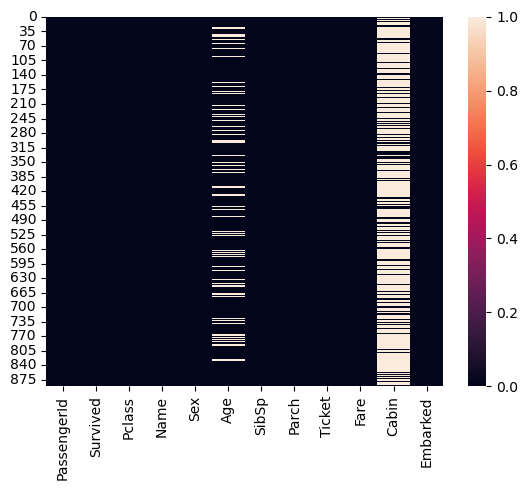

In [29]:
sns.heatmap(df.isnull())

<Axes: >

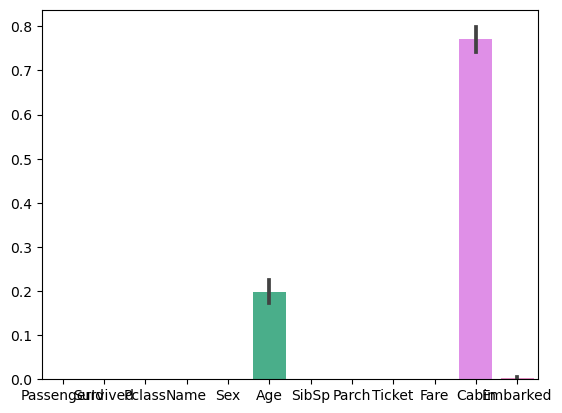

In [30]:
sns.barplot(df.isna())

In [31]:
df.Age=df.Age.fillna(df.Age.mean())

In [32]:
df.Age.isna().sum()

0

<Axes: >

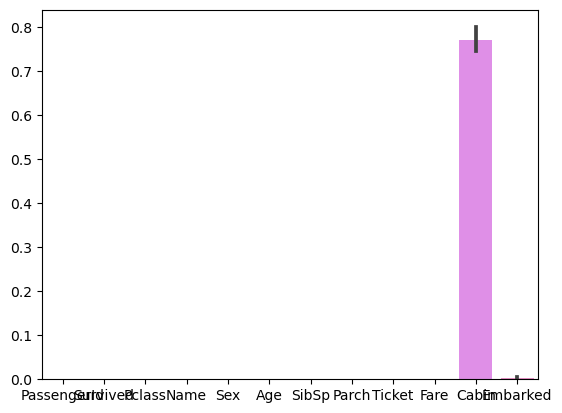

In [33]:
sns.barplot(df.isna())

In [34]:
df.drop('Cabin',axis=1,inplace=True)

In [35]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [36]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [37]:
df.Embarked=df.Embarked.fillna('S')

In [38]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
Gender = pd.get_dummies(df.Sex)
Gender

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [40]:
embarked = pd.get_dummies(df.Embarked) 
embarked

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [41]:
df=pd.concat([df,Gender,embarked],axis=1)

In [42]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,0,1,1,0,0


In [45]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [46]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,0,1,1,0,0


delete names and passengerid and ticket

In [49]:
df.drop(['Name','PassengerId','Ticket'],axis=True,inplace=True)

In [50]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,1,35.000000,1,0,53.1000,1,0,0,0,1
4,0,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,1
888,0,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,1,26.000000,0,0,30.0000,0,1,1,0,0


<Axes: xlabel='Survived', ylabel='count'>

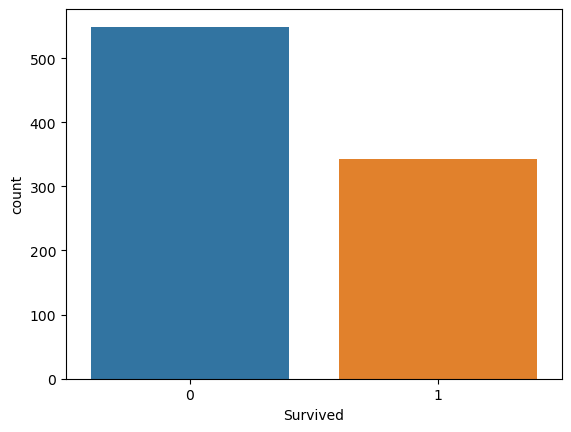

In [54]:
sns.countplot(x=df.Survived)

<Axes: xlabel='Survived', ylabel='count'>

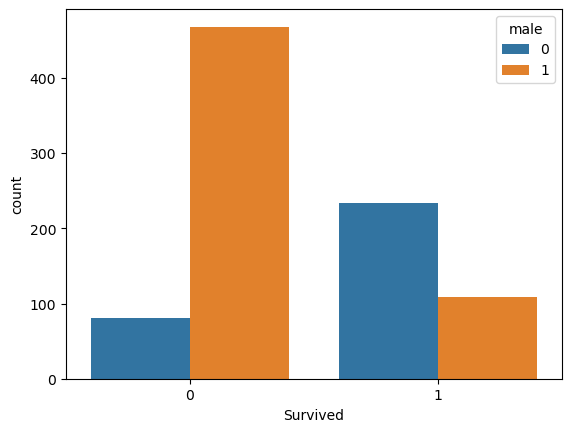

In [55]:
sns.countplot(x=df.Survived,hue=df.male)

<Axes: xlabel='Age', ylabel='Count'>

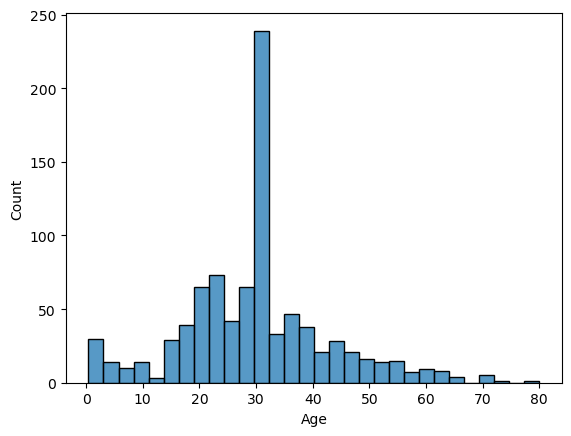

In [56]:
sns.histplot(df.Age)

<Axes: xlabel='Fare', ylabel='Count'>

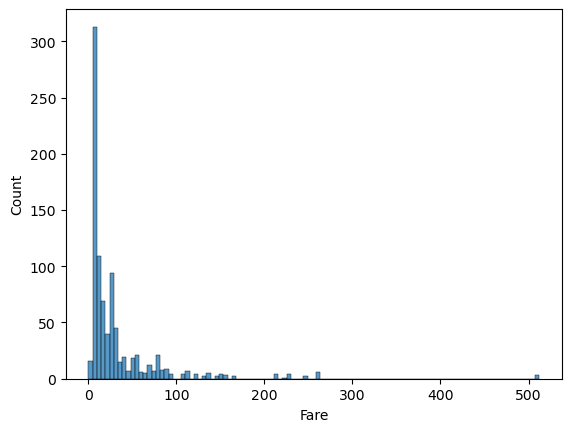

In [57]:
sns.histplot(df.Fare)

<Axes: >

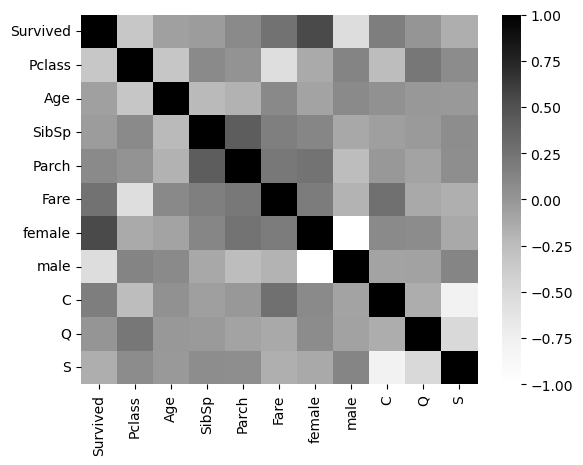

In [62]:
sns.heatmap(df.corr(),cmap='Greys')

# Machine Learning : Split Data

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
# featues
X = df.drop('Survived',axis=1)
X

,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [74]:
# target
y= df[['Survived']]
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [75]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [76]:
print ('X_train : ' , X_train) 
print ('y_train : ' , y_train) 
print ('X_test : ' , X_test) 
print ('y_test : ' , y_test) 

X_train :       Pclass        Age  SibSp  Parch     Fare  female  male  C  Q  S
301       3  29.699118      2      0  23.2500       0     1  0  1  0
309       1  30.000000      0      0  56.9292       1     0  1  0  0
516       2  34.000000      0      0  10.5000       1     0  0  0  1
120       2  21.000000      2      0  73.5000       0     1  0  0  1
570       2  62.000000      0      0  10.5000       0     1  0  0  1
..      ...        ...    ...    ...      ...     ...   ... .. .. ..
715       3  19.000000      0      0   7.6500       0     1  0  0  1
767       3  30.500000      0      0   7.7500       1     0  0  1  0
72        2  21.000000      0      0  73.5000       0     1  0  0  1
235       3  29.699118      0      0   7.5500       1     0  0  0  1
37        3  21.000000      0      0   8.0500       0     1  0  0  1

[712 rows x 10 columns]
y_train :       Survived
301         1
309         1
516         1
120         0
570         1
..        ...
715         0
767         0

# Model Training and Predicting

# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model=LogisticRegression()

In [79]:
model.fit(X_train,y_train)

C:\Users\clt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\clt\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
model.score(X_train,y_train)

0.8061797752808989

In [82]:
y_pre= model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix

In [86]:
confusion_matrix(y_test,y_pre)

array([[91, 15],
       [21, 52]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report

In [88]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       106
           1       0.78      0.71      0.74        73

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



# SVM

In [107]:
from sklearn.svm import SVC
model = SVC(C=10)

In [108]:
model.fit(X_train, y_train)

C:\Users\clt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10)

In [109]:
model.score(X_test, y_test)

0.6815642458100558

# KNN

In [110]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model1=KNeighborsClassifier(n_neighbors=7)

In [124]:
model1.fit(X_train, y_train)

C:\Users\clt\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [125]:
model1.score(X_test,y_test)

0.7262569832402235

# Naive Bayes

In [126]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [132]:
from sklearn.metrics import accuracy_score

In [127]:
gnb = GaussianNB()

In [128]:
mnb = MultinomialNB()

In [129]:
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)

C:\Users\clt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\clt\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [133]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)

In [135]:
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_gnb

0.770949720670391

In [137]:
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_mnb

0.6480446927374302